# Modelling the Heat Equation

This assignment explores the dissipation of heat across a bar, which is described by the 2nd order ODE known as the "heat equation" 
$$
\begin{equation}
\frac{\partial^2 \theta}{\partial x^2} + \frac{\partial^2 \theta}{\partial y^2} = 0.
\end{equation}
$$

Two approaches are taken to model this equation. The first approach involves the usage of the successive over-relaxation update

$$ 
\begin{equation}
\theta_{i,j}^{(k+1)}=\frac{\omega}{4}\left(\theta_{i+1,j}^{(k)}+\theta_{i-1,j}^{(k)}+\theta_{i,j+1}^{(k)}+\theta_{i,j-1}^{(k)}\right)+(1-\omega)\theta_{i,j}^{(k)}
\end{equation}
$$

where $i$ and $j$ are indices of a $ 2 \times 2 $ matrix $\theta$, and is a refinement of the Gauss-Seidel method through the introduction of parameter $\omega$. The second method used involves modelling the time evolution of the bar through 

$$
\begin{equation}
\theta_{i,j,n+1}=\theta_{i,j,n}+\zeta\left(\theta_{i+1,j,n}+\theta_{i-1,j,n}+\theta_{i,j+1,n}+\theta_{i,j-1,n}-4\theta_{i,j,n}\right)
\end{equation}
$$

where $\zeta$ is another parameter that was defined to be equal to $0.1$ throughout the simulation.

In [18]:
# Appropriate imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 1. Set up the SOR solver

In [19]:
def update_GS_SOR(arr, M, N, omega):
    """
    Solves the heat equation through the successive
    over relaxation (SOR) approach

    Inputs:
    arr     M x N array of temperature
    M       Number of rows of arr
    N       Number of columns of arr 
    omega   Parameter for the SOR equation

    Outputs:
    arr     Updated version of arr at next timestep  
    """
    # We exclude i=0, i=M, j=0 and j=N as they are boundaries
    for i in range(1, M-1):
        for j in range(1, N-1):
            arr[i,j] = 0.25*omega*(arr[i-1,j] + arr[i+1,j] 
            + arr[i,j-1] + arr[i,j+1]) + (1-omega)*arr[i,j]
    return arr

### 2. Set up the array and initial conditions

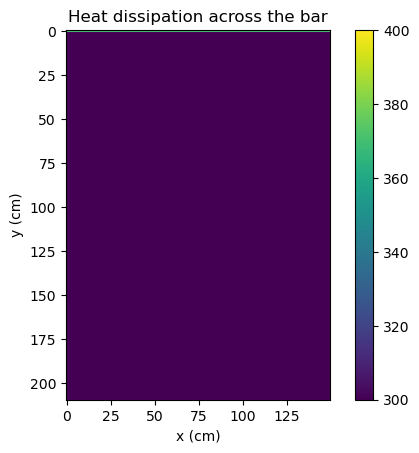

In [20]:
# Increasing each factor by 10 to improve simulation quality
# Dimensions of the bar (in cm)
M = 210
N = 150

# Boundary conditions for temperature
T1 = 3000
T2 = 4000
theta = T1 * np.ones((M,N))
theta[0,:] = T2

# Plot initial guess
plt.imshow(theta/10)
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.title('Heat dissipation across the bar')
plt.colorbar()

### 3. Run the solver and plot the result

In [21]:
omega = 0.5
delta = 10
tol = 0.1
iter = 1
while delta > tol and iter < 1500:
    thetain = np.copy(theta)
    theta = update_GS_SOR(theta, M, N, omega)
    delta = np.max(np.abs(thetain-theta))
    iter += 1
print("Finished after ",iter," iterations")

Finished after  1500  iterations


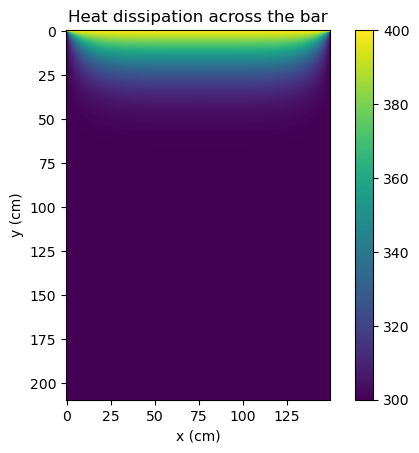

In [22]:
# Plot final

plt.imshow(theta/10)
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.title('Heat dissipation across the bar')
plt.colorbar()

### 4. Time evolution function

In [23]:
def update_temperature2D(temper, M, N, zeta):
    """
    Performs explicit forward FD update for heat equation
    
    Inputs:
    temper        Array of temperature at present timestep
    n             Temperature timestep to calculate
    zeta          Constant of proportionality
    
    Outputs:
    temper_next   Array of temperature at the next timestep      
    """
    # How do you initialise temper_next to preserve boundary conditions?
    temper_next = np.copy(temper)
    for i in range(1, M-1): # Don't update end-points
        for j in range(1, N-1):
            temper_next[i,j] = temper[i,j] + zeta*(temper[i+1,j]
            + temper[i-1,j] + temper[i,j+1] + temper[i,j-1] 
            -4*temper[i,j]) 
    return temper_next

### 5. Set up initial conditions

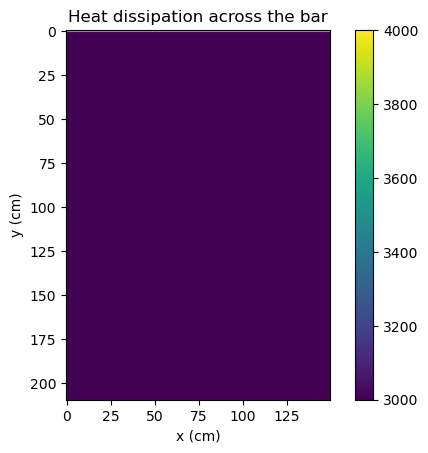

In [24]:
# Increasing each factor by 10 to improve simulation quality
M = 210
N = 150
T1 = 3000
T2 = 4000
theta0 = T1*np.ones((M,N))
theta0[0,:] = T2
theta_comp = np.copy(theta0)
# Plot initial guess

plt.imshow(theta0)
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.title('Heat dissipation across the bar')
plt.colorbar()

### 6. Propagate the solution and store selected points

In [25]:
Nt = 2000
zeta = 0.1
for i in range(Nt):
    theta_next = update_temperature2D(theta0, M, N, zeta)
    theta0 = theta_next

### Plot the final and steady-state solutions
Both simulations were plotted side-by-side and compared below, with a third plot of their difference also plotted.

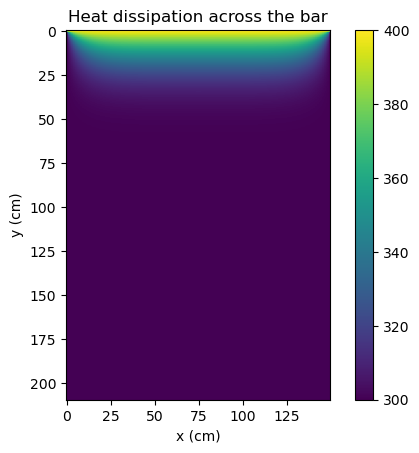

In [26]:
fig2 = plt.figure()
plt.imshow(theta0/10)
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.title('Heat dissipation across the bar')
plt.colorbar()


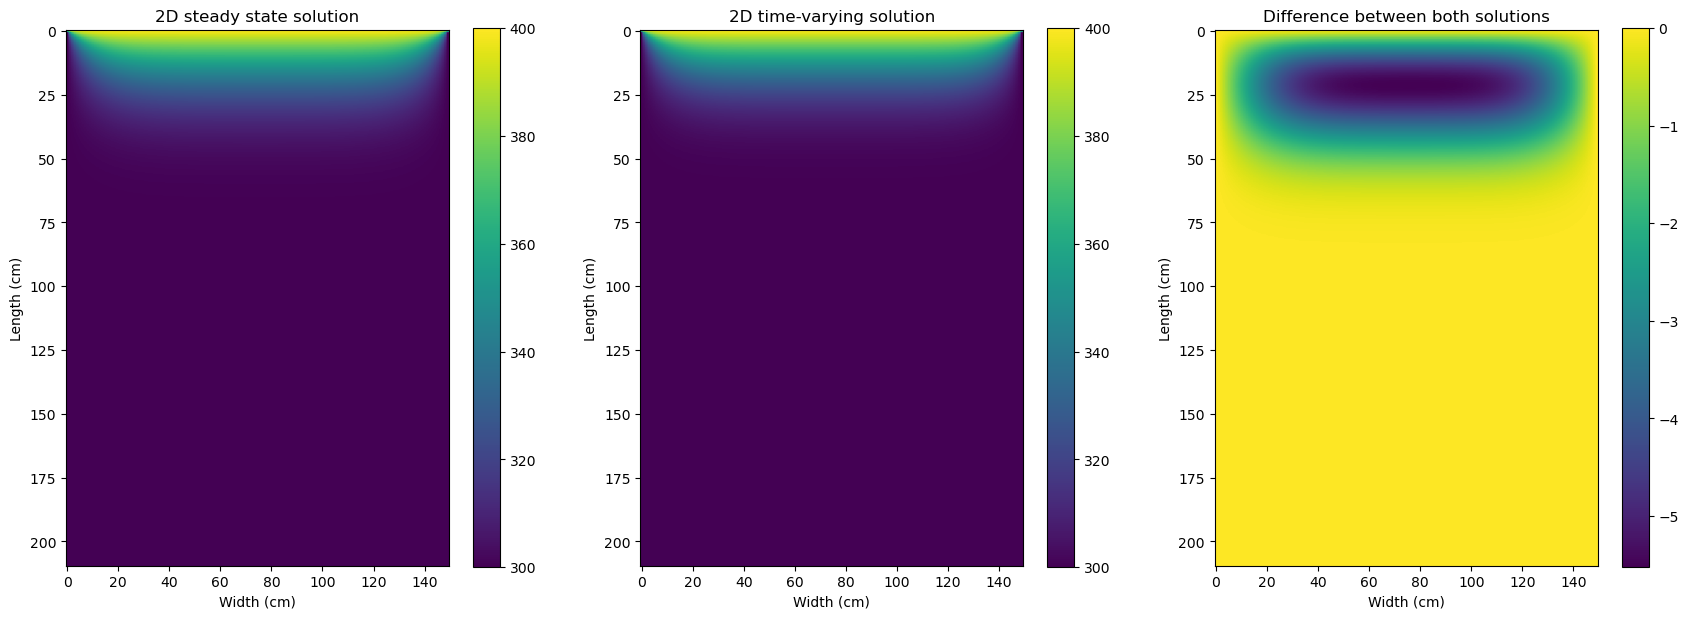

In [27]:
#fig = plt.figure(figsize=(15,5))

fig, axs = plt.subplots(1,3, figsize=(21,7))

theta_diff = theta0 - theta
thetas = [theta, theta0, theta_diff]
titles = ['2D steady state solution', '2D time-varying solution', 'Difference between both solutions']

for col in range(3):
    ax = axs[col]
    ax.set_xlabel('Width (cm)')
    ax.set_ylabel('Length (cm)')
    ax.set_title(titles[col])
    pcm = ax.imshow(thetas[col]/10)
    plt.colorbar(pcm, ax=ax)

In [28]:
# Calculating largest percentage change between both plots
theta_perc = theta_diff / theta
print(np.max(abs(theta_perc))*100 ,"%")

1.6645794108070069 %


Though both appear to be very similar, there is a slight difference between both plots, as is shown by the third plot. This difference is fairly small however (detailing around a 1.7% change between the plots at the greatest change), which shows that both methods are generally speaking harmonious with one another.

## Conclusion

As can be seen from both plots, there is a slight difference when calculating the dissipation of heat, and this has been calculated to be around a 1.7% difference at most. For the case of time-evolution, the number of iterations had to be increased from 400 up to 2000 (at the expense of runtime) to reach a satisfactory result that resembled the steady state plot. Also, each simulation ran over a greater distance (in centimetres instead of metres) and subsequently a higher temperature (of magnitude one times greater than original). This less discrete method facilitated a smoother plot in both cases at the expense of runtime.